<a href="https://colab.research.google.com/github/maheshkumar30/Intellipaat-DataScience/blob/main/PCA(Principle_Component_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Principle Component Analysis(PCA)**
PCA is an unsupervised ML algorithm which we use to reduce the number of variables of dataset(Dimensions),while preserving as much information as possible.

**Key Terms**
* **principle components**:These are the new variables that are constructed as linear combinations or mixture of intial variables.
* These combinations are done in such a way that the new variables are uncorrelated and most of the information within the initial varibles is taken or compressed into the final principle component.

**How do you do a principle component analysis**
* Standardize the range of initial variables
* We will find covariance matrix to identify the correlation
* Now,We compute,eigenvector and eigen value of the covariance matrix to identify the prinicole components
* Then,we sort the eigen values in decreasing order to pick the hightest ones
* We recast the data along

In [55]:
from sklearn.datasets import load_digits

In [56]:
dataset = load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [57]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [58]:
import numpy as np
import pandas as pd

In [59]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [60]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [61]:
df['Target']=dataset.target

In [62]:
df.shape

(1797, 65)

In [63]:
print(f"Target is:{dataset.target[0]}")
dataset.data

Target is:0


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [64]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [65]:
import seaborn as sb
import matplotlib.pyplot as plt


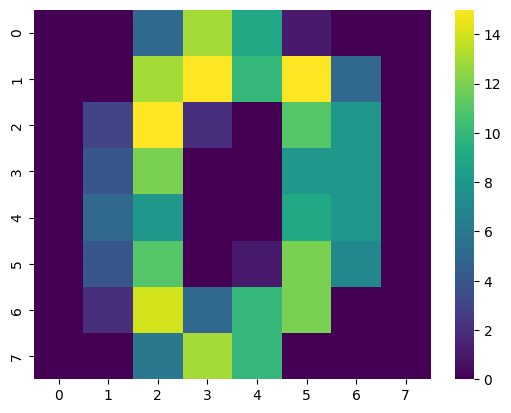

In [66]:
sb.heatmap(dataset.data[0].reshape(8,8),cmap="viridis")
plt.show()

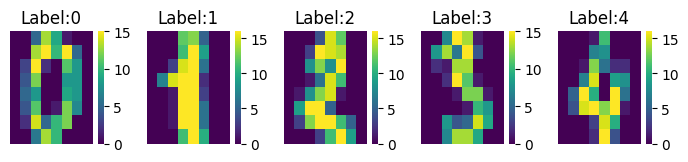

In [67]:
num_image = 5
plt.figure(figsize=(7,3))
for i in range(num_image):
    plt.subplot(2,5,i+1),sb.heatmap(dataset.images[i],cmap="viridis")
    plt.title(f"Label:{dataset.target[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [68]:
x=df.iloc[:,:-1]
x.shape

(1797, 64)

In [69]:
y=dataset.target
y.shape

(1797,)

##**Let's Start implementing PCA**
**We Standardize our data**

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [72]:
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [73]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [74]:
pd.DataFrame(x_scaled.T)

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,...,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016
2,-0.043081,-1.094937,-1.094937,0.377661,-1.094937,1.429517,-1.094937,0.377661,0.798404,1.219146,...,1.008775,-1.094937,0.588032,-0.043081,-1.094937,-0.253452,0.167290,-0.884566,-0.674195,1.008775
3,0.274072,0.038648,-1.844742,0.744919,-2.551014,-0.432200,0.038648,-0.903047,0.509495,0.038648,...,0.980343,-2.551014,0.980343,0.038648,-2.080166,-0.432200,0.980343,-0.196776,-0.432200,0.509495
4,-0.664478,0.268751,0.735366,0.268751,-0.197863,-2.764242,0.268751,0.268751,-0.897785,-2.764242,...,0.735366,0.035444,-2.064321,-0.897785,0.735366,0.268751,0.268751,0.735366,-1.131092,-0.897785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.208293,-0.249010,-2.078218,0.208293,-2.306869,0.894246,-0.706312,-1.620916,0.894246,-0.020358,...,0.208293,-2.764171,0.894246,-0.020358,-2.535520,0.436944,0.894246,-0.706312,-0.020358,-0.020358
60,-0.366771,0.849632,-0.164037,0.241430,0.849632,0.849632,0.646898,-2.394110,0.646898,0.241430,...,-0.366771,0.444164,-0.366771,0.038697,0.849632,0.646898,0.444164,0.241430,0.849632,0.444164
61,-1.146647,0.548561,1.565686,0.379040,-0.468564,0.548561,0.718081,-1.146647,0.718081,-0.638085,...,-0.468564,0.379040,-0.977127,-0.638085,-0.468564,0.379040,-0.129523,-0.129523,0.887602,0.887602
62,-0.505670,-0.505670,1.695137,-0.505670,-0.505670,-0.505670,0.227932,-0.505670,-0.261136,-0.505670,...,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.261136


In [75]:
cov_mat=np.cov(x_scaled.T)

In [76]:
cov_mat.shape

(64, 64)

##**Since in Covariance**
* Rows: expect Variables
* columns: expect values(dependents)
Our data does not follow the same presentation,so **we need to,Transpose**

In [77]:
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000557,0.556928,0.207929,-0.018771,0.060810,0.048415,-0.038948,0.032338,0.556682,...,0.030970,-0.045368,-0.007910,0.856086,0.556036,0.147728,-0.102406,-0.029887,0.026562,-0.043913
2,0.0,0.556928,1.000557,0.560492,-0.084282,0.043593,0.002842,-0.062313,0.022324,0.582583,...,0.050877,-0.003806,-0.025851,0.515563,0.938145,0.500118,-0.134829,-0.041206,0.072639,0.082569
3,0.0,0.207929,0.560492,1.000557,0.023952,-0.171473,-0.115796,-0.040162,0.035683,0.328527,...,0.139475,0.075376,-0.049112,0.175902,0.560638,0.768373,-0.065993,-0.054966,0.053467,0.082016
4,0.0,-0.018771,-0.084282,0.023952,1.000557,0.508014,0.127835,0.010070,0.042089,0.051686,...,-0.265116,-0.212339,0.017362,-0.047250,-0.020187,-0.008872,-0.082171,-0.215929,-0.250838,-0.215469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.147728,0.500118,0.768373,-0.008872,-0.068076,-0.045871,0.001013,0.043398,0.305361,...,0.094770,0.050060,-0.038269,0.113035,0.481979,1.000557,0.058423,-0.095009,0.006853,0.099727
60,0.0,-0.102406,-0.134829,-0.065993,-0.082171,-0.351342,-0.383735,-0.178343,0.049024,-0.000604,...,0.394499,0.105160,0.005700,-0.117973,-0.208072,0.058423,1.000557,0.609854,0.243441,0.103073
61,0.0,-0.029887,-0.041206,-0.054966,-0.215929,-0.268967,-0.304281,-0.141253,0.033428,0.071528,...,0.707913,0.262942,-0.003058,-0.043913,-0.091890,-0.095009,0.609854,1.000557,0.648689,0.262137
62,0.0,0.026562,0.072639,0.053467,-0.250838,-0.267808,-0.179044,-0.063256,0.020700,0.111631,...,0.602602,0.512011,-0.011939,0.014565,0.035388,0.006853,0.243441,0.648689,1.000557,0.620774


##**We find Eigen values and Vectors(Principle Components)**

In [78]:
eig_val,eig_vector=np.linalg.eig(cov_mat)

In [79]:
eig_val.shape

(64,)

In [80]:
eig_vector.shape

(64, 64)

In [81]:
pd.DataFrame(eig_val)

,0
0,7.344776
1,5.835491
2,5.153961
3,3.966236
4,2.966345
...,...
59,0.200091
60,0.189835
61,0.000000
62,0.000000


In [82]:
pd.DataFrame(eig_vector)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,0.182234,-0.047027,0.023588,-0.178153,-0.029978,0.231723,-0.108310,0.125524,0.213820,0.059834,...,0.039356,-0.036629,0.082404,0.052290,0.197267,0.024853,0.052605,0.0,0.0,0.0
2,0.285868,-0.059565,-0.056799,-0.156129,-0.014666,0.119875,-0.004755,0.006178,0.120140,0.007681,...,-0.080164,0.176636,0.091203,-0.001822,-0.129372,-0.069592,-0.090823,0.0,0.0,0.0
3,0.220370,0.020804,-0.040464,-0.167800,0.043716,-0.100392,0.233717,-0.033408,-0.101895,-0.021639,...,0.125306,-0.224852,-0.089657,0.040788,-0.148353,0.052446,-0.323498,0.0,0.0,0.0
4,-0.025170,-0.155903,-0.067065,0.000009,-0.139993,-0.093471,-0.039540,0.046161,-0.093102,0.005066,...,0.049967,-0.024456,0.039529,0.012110,-0.072823,-0.057241,0.048470,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.194449,0.009905,-0.083464,-0.171490,0.100375,-0.086503,0.135319,-0.098852,-0.115978,-0.105825,...,-0.067003,0.101720,-0.245611,-0.069682,0.336075,0.080163,0.138750,0.0,0.0,0.0
60,0.017774,0.251934,-0.062455,0.154438,-0.003774,0.111832,-0.172848,-0.055067,-0.154210,-0.100353,...,-0.116854,0.219353,0.196726,0.048100,-0.189613,-0.081401,-0.036926,0.0,0.0,0.0
61,0.103198,0.242618,-0.022280,0.252432,0.094738,0.057756,-0.032155,0.034265,-0.027141,-0.036675,...,0.193102,-0.023445,0.152260,-0.131265,-0.019375,-0.033929,-0.168659,0.0,0.0,0.0
62,0.119811,0.165089,0.100366,0.160720,0.244026,0.028957,0.077612,-0.164484,0.144245,0.057176,...,0.067240,0.095552,-0.207269,0.284186,0.086148,-0.141619,0.094642,0.0,0.0,0.0


In [83]:
total=sum(eig_val)

In [84]:
total

np.float64(61.033964365256246)

In [85]:
sorted(eig_val,reverse=True)

[np.float64(7.344776062836354),
 np.float64(5.835490537329551),
 np.float64(5.1539611764188535),
 np.float64(3.9662359665872913),
 np.float64(2.966345195093588),
 np.float64(2.5720444193206107),
 np.float64(2.4060094135782055),
 np.float64(2.0686735457465515),
 np.float64(1.829933143826965),
 np.float64(1.7895173923196808),
 np.float64(1.6978461553340445),
 np.float64(1.5728788868795183),
 np.float64(1.3887078149450438),
 np.float64(1.3593360885653991),
 np.float64(1.3215253598609098),
 np.float64(1.168291764467524),
 np.float64(1.0836867752499109),
 np.float64(0.9997786171449639),
 np.float64(0.9743829305689543),
 np.float64(0.9089124184577173),
 np.float64(0.8227192644558226),
 np.float64(0.7763101392596111),
 np.float64(0.7115567531171415),
 np.float64(0.6455236480610055),
 np.float64(0.5952739876615554),
 np.float64(0.5765017972018559),
 np.float64(0.5267315516205454),
 np.float64(0.5106363011725038),
 np.float64(0.48686381297937253),
 np.float64(0.45560107052785476),
 np.float64(0

##**Explained Variance**

In [86]:
var_exp = [(i/total)*100 for i in sorted(eig_val,reverse=True)]

In [87]:
sum(var_exp)

np.float64(100.00000000000004)

**We will find cummulative sum of exp variance because we need to see at what specific component the strenght stop increase**

In [88]:
cum_var_exp=np.cumsum(var_exp)

In [89]:
pd.DataFrame(cum_var_exp)

,0
0,12.033916
1,21.594971
2,30.039385
3,36.537793
4,41.397948
...,...
59,99.917465
60,100.000000
61,100.000000
62,100.000000


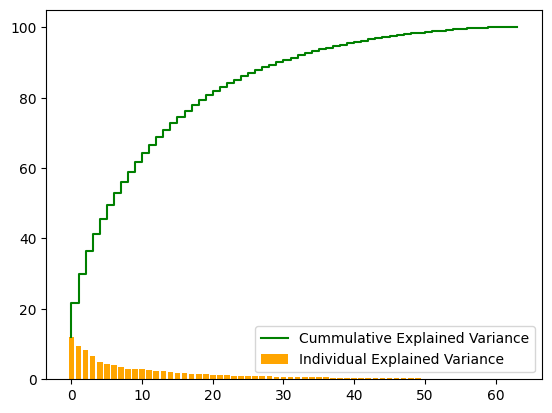

In [90]:
plt.bar(range(len(var_exp)),var_exp,label='Individual Explained Variance',color="Orange")
plt.step(range(len(cum_var_exp)),cum_var_exp,label='Cummulative Explained Variance',color="g")
plt.legend()
plt.show()

**From the graph, i can choose our components between 30-40 and we can do hit anf trail - In between 30-40,i can upto 90 - 95%**

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(0.95)         # we want 95% of the total data
PCA(n_components=30)    # It selects as many component you want to retrieve

PCA(n_components=30)

In [93]:
x_pca=pca.fit_transform(x)

In [94]:
x_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

In [95]:
x_pca.shape,x.shape

((1797, 29), (1797, 64))

In [96]:
pca.n_components_   #In 29 new principle component,i am able to get 95% of the complete data


np.int64(29)

**Let's Build  a supervise model and test the pca data**

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
model = LogisticRegression(max_iter = 100)

In [101]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
model.score(x_test,y_test) # accuracy Metrics of Training data

0.9611111111111111

In [103]:
y_pred = model.predict(x_test)
y_pred

array([6, 9, 3, 7, 3, 1, 5, 2, 5, 2, 1, 1, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 2, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 1, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [104]:
output = pca.inverse_transform(x_test[1])
output

array([ 0.00000000e+00,  6.73198672e-01,  1.14902982e+01,  1.57686118e+01,
        8.22837243e+00, -2.69192818e-01, -2.68192142e-01, -2.58287303e-01,
        7.33171841e-03,  4.97330716e+00,  1.73376089e+01,  9.45191466e+00,
        1.37610861e+01,  9.62492713e+00,  2.81225467e-01, -1.10603575e-01,
        5.94498353e-03,  6.54383290e+00,  1.52284773e+01,  1.00853574e+00,
        8.35298547e+00,  1.51884090e+01,  1.35015282e+00,  2.49914729e-02,
        1.56653842e-03,  3.93357726e+00,  1.47323777e+01,  1.19828938e+01,
        1.63511145e+01,  1.62627903e+01,  1.27399965e+00,  1.63610236e-03,
        2.32230140e-15,  1.01852929e+00,  4.92579076e+00,  7.13333953e+00,
        6.67511879e+00,  1.62343040e+01,  4.71467463e+00, -9.18204787e-16,
       -3.04308735e-02, -8.46959035e-01, -1.17179726e-01,  7.37659731e-01,
        5.15922704e+00,  1.54304690e+01,  4.20844033e+00, -3.60224431e-02,
       -4.40517818e-02,  5.20026170e-02,  3.72695752e+00,  6.27468549e+00,
        1.59261075e+01,  

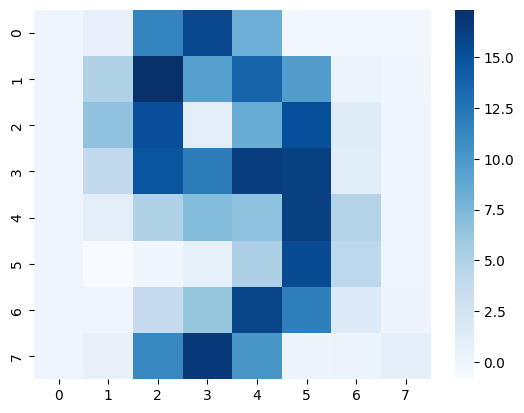

In [105]:
sb.heatmap(output.reshape(8,8), cmap="Blues")
plt.show()